# Tflearn

In [1]:
import pandas as pd
import tflearn
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# Fire and Theft in Chicago

# In the following data pairs

# X = fires per 1000 housing units
# Y = thefts per 1000 population within the same Zip code in the Chicago metro area.

df = pd.read_excel('slr05.xls')

*** No CODEPAGE record, no encoding_override: will use 'ascii'


In [3]:
df.head()

,X,Y
0,6.2,29
1,9.5,44
2,10.5,36
3,7.7,37
4,8.6,53


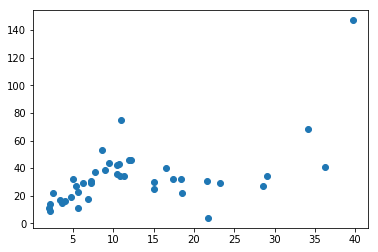

In [4]:
plt.scatter(df['X'],df['Y'])
plt.show()

In [5]:
x = df['X']
X = x.tolist()

y = df['Y']
Y = x.tolist()

In [6]:
# Linear Regression graph
input_ = tflearn.input_data(shape=[None])
linear = tflearn.single_unit(input_)
regression = tflearn.regression(linear, optimizer='sgd', loss='mean_square',
                                metric='R2', learning_rate=0.001)
m = tflearn.DNN(regression)
m.fit(X, Y, n_epoch=500, show_metric=True, snapshot_epoch=False)

print("\nRegression result:")
print("Y = " + str(m.get_weights(linear.W)) +
      "*X + " + str(m.get_weights(linear.b)))

Training Step: 500  | total loss: 0.18964 | time: 0.004s
| SGD | epoch: 500 | loss: 0.18964 - R2: 1.0006 -- iter: 42/42

Regression result:
Y = [ 0.96381027]*X + [ 0.71846169]


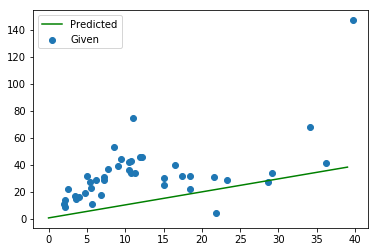

In [7]:
x_line = np.arange(0,40).reshape(-1,1)
p = []
for i,x in enumerate(x_line):
    p.append(m.predict(x))

plt.scatter(df['X'],df['Y'],label='Given')
plt.plot(x_line,p, color='green',label='Predicted')
plt.legend()

plt.show()

# Sklearn

In [8]:
from sklearn import linear_model

In [9]:
regr = linear_model.LinearRegression()
x_ = np.array(X).reshape(-1,1)
y_ = np.array(Y).reshape(-1,1)
regr.fit(x_,y_)
x_line = np.arange(0,40).reshape(-1,1)
m = regr.predict(x_line)

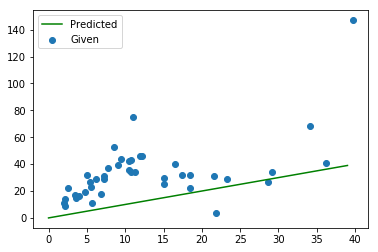

In [10]:
plt.scatter(df['X'],df['Y'],label='Given')
plt.plot(x_line,m, color='green',label='Predicted')
plt.legend()
plt.show()

# Tensorflow

Instructions for updating:
Use `tf.global_variables_initializer` instead.
('Epoch:', '0050', 'cost=', '0.490202099', 'W=', 1.0871797, 'b=', -1.6422478)
('Epoch:', '0100', 'cost=', '0.340309769', 'W=', 1.0726382, 'b=', -1.368322)
('Epoch:', '0150', 'cost=', '0.236251786', 'W=', 1.0605224, 'b=', -1.1400883)
('Epoch:', '0200', 'cost=', '0.164011434', 'W=', 1.0504273, 'b=', -0.9499228)
('Epoch:', '0250', 'cost=', '0.113860734', 'W=', 1.042016, 'b=', -0.79147673)
('Epoch:', '0300', 'cost=', '0.079044916', 'W=', 1.0350077, 'b=', -0.65945953)
('Epoch:', '0350', 'cost=', '0.054874938', 'W=', 1.0291686, 'b=', -0.54946214)
('Epoch:', '0400', 'cost=', '0.038095396', 'W=', 1.0243032, 'b=', -0.45781261)
('Epoch:', '0450', 'cost=', '0.026446825', 'W=', 1.0202495, 'b=', -0.3814503)
('Epoch:', '0500', 'cost=', '0.018360075', 'W=', 1.0168718, 'b=', -0.31782547)
('Epoch:', '0550', 'cost=', '0.012746127', 'W=', 1.0140579, 'b=', -0.26481301)
('Epoch:', '0600', 'cost=', '0.008848610', 'W=', 1.0117129, 'b='

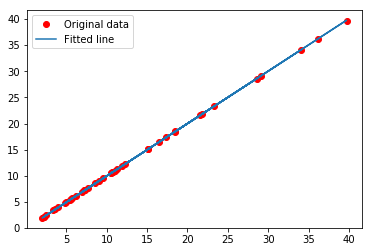

In [11]:
%matplotlib inline
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50
# Training Data
#X = [3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1]
#Y = [1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3]
train_X = numpy.asarray(X)
train_Y = numpy.asarray(Y)
n_samples = train_X.shape[0]

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initializing the variables
init = tf.initialize_all_variables()
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print( "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c),"W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

In [15]:
train_Y

array([  6.2,   9.5,  10.5,   7.7,   8.6,  34.1,  11. ,   6.9,   7.3,
        15.1,  29.1,   2.2,   5.7,   2. ,   2.5,   4. ,   5.4,   2.2,
         7.2,  15.1,  16.5,  18.4,  36.2,  39.7,  18.5,  23.3,  12.2,
         5.6,  21.8,  21.6,   9. ,   3.6,   5. ,  28.6,  17.4,  11.3,
         3.4,  11.9,  10.5,  10.7,  10.8,   4.8])